In [8]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [10]:
villes = pd.read_csv('./villes.csv', sep=';')
villes.head(5)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [14]:
villes.shape

(32, 13)

In [109]:
X = villes.iloc[:,1:13].values
labels = villes.iloc[:,0].values

# ACP

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [111]:
SC = StandardScaler()
SC.fit(X)
xnorm=SC.transform(X)

In [112]:
pca = PCA(n_components=12)
pca.fit(xnorm)

PCA(n_components=12)

In [113]:
pca.explained_variance_

array([10.80999558,  1.45184229,  0.0581652 ,  0.03279996,  0.01406283,
        0.00621041,  0.00523837,  0.00406512,  0.00187861,  0.00145726,
        0.0010361 ,  0.00034505])

In [114]:
pca.explained_variance_ratio_

array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

In [115]:
pca.components_[0,:]

array([0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
       0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
       0.29242808, 0.2729549 ])

In [116]:
1/np.sqrt(12)

0.2886751345948129

In [117]:
pca.components_[1,:]

array([ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
       -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
        0.26269461,  0.38693688])

In [118]:
X_pca = pca.transform(xnorm)

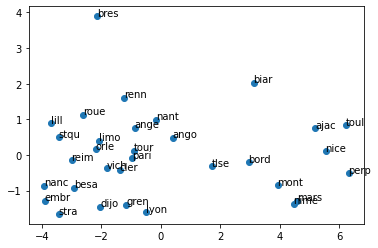

In [119]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

x correspond à la température moyenne et y à l'écart de température entre les saisons

## Crimes

In [120]:
crimes = pd.read_csv('./crimes.csv', sep=';')
crimes.head(5)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [121]:
crimes.shape

(50, 8)

In [122]:
x_crimes = crimes.iloc[:,1:8].values
labels_crimes = crimes.iloc[:,0].values

In [123]:
x_crimes.shape

(50, 7)

In [124]:
labels_crimes.shape

(50,)

In [125]:
sc_crimes = StandardScaler()
sc_crimes.fit(x_crimes)
x_crimes_norm=sc_crimes.transform(x_crimes)

In [126]:
pca_crimes = PCA(n_components=7)
pca_crimes.fit(x_crimes_norm)

PCA(n_components=7)

In [127]:
pca_crimes.explained_variance_

array([4.19893828, 1.26400187, 0.74062921, 0.32288984, 0.26323924,
       0.22657089, 0.12658781])

In [128]:
pca_crimes.explained_variance_ratio_

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

On doit retenir 4 axes si on veut représenter au moins 90% de l'information. Nous allons utiliser le critère de Kaiser et prendre 2 axes.

In [129]:
pca_crimes.components_[0,:]

array([0.30027916, 0.43175936, 0.39687549, 0.3966517 , 0.44015721,
       0.35735953, 0.29517681])

In [130]:
pca_crimes.components_[1,:]

array([-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
        0.40231912,  0.50242093])

In [131]:
X_pca_crimes = pca_crimes.transform(x_crimes_norm)

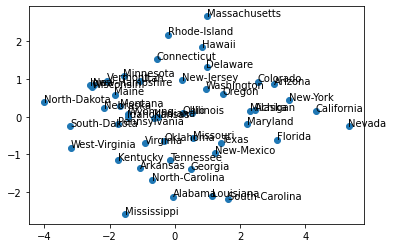

In [132]:
plt.scatter(X_pca_crimes[:, 0], X_pca_crimes[:, 1])
for label, x, y in zip(labels_crimes, X_pca_crimes[:, 0], X_pca_crimes[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

## Startups

In [133]:
startups = pd.read_csv('./50_Startups.csv', sep=';')
startups.head(5)

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [134]:
startups.shape

(50, 5)

In [135]:
x_startups = startups.iloc[:,1:5].values
id_startups = startups.iloc[:,0].values

In [136]:
x_startups.shape

(50, 4)

In [137]:
id_startups.shape

(50,)

In [138]:
sc_startups = StandardScaler()
sc_startups.fit(x_startups)
x_startups_norm = sc_startups.transform(x_startups)

In [139]:
pca_startups = PCA(n_components=4)
pca_startups.fit(x_startups_norm)

PCA(n_components=4)

In [140]:
pca_startups.explained_variance_

array([2.7267099 , 1.04019163, 0.28830861, 0.02642251])

In [141]:
pca_startups.explained_variance_ratio_

array([0.66804393, 0.25484695, 0.07063561, 0.00647351])

Pour conserver au moins 90% de l'information représentée on doit prendre 2 axes.

In [142]:
pca_startups.components_[0,:]

array([0.59347855, 0.14737886, 0.52064694, 0.59580992])

In [143]:
pca_startups.components_[1,:]

array([-0.04048087, -0.95051314,  0.30797098,  0.00632069])

In [144]:
X_pca_startups = pca_startups.transform(x_startups_norm)

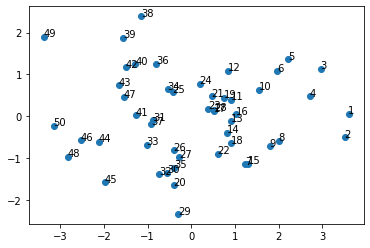

In [145]:
plt.scatter(X_pca_startups[:, 0], X_pca_startups[:, 1])
for label, x, y in zip(id_startups, X_pca_startups[:, 0], X_pca_startups[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

# Clustering

In [160]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib
from sklearn import metrics

In [180]:
clustering = KMeans(n_clusters=3).fit_predict(xnorm)

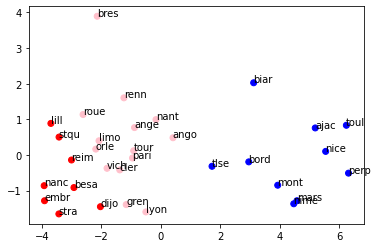

In [181]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()    

In [182]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(xnorm)

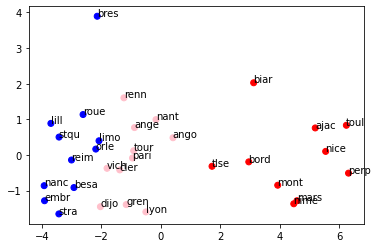

In [183]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [184]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(xnorm)

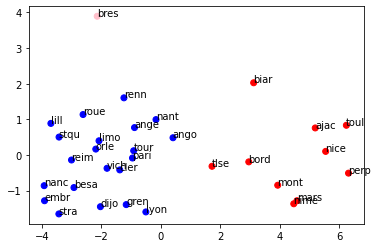

In [185]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [187]:
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X)
    print(i, metrics.silhouette_score(xnorm, clustering,metric='euclidean'))
    print()

2 0.625557719180767

3 0.36317411430773

4 0.29498407218623257

5 0.3029178653771073



D'après le critère silhouette index, la meilleure partition est 2 pour KMeans :

In [188]:
clustering = KMeans(n_clusters=2).fit_predict(xnorm)

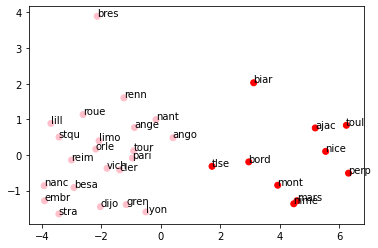

In [189]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [ ]:
On peut déceler une ségmentation topologique des ville